In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Reading a Table from a File  ##

More commonly, we create tables by reading data file (usually a comma separated value (.csv) file).

Let's explore this by looking at data on the number of troops in Napoleon's army as they tried to invade Russia in 1812. This data was the data that was used by [Charles Joseph Minard](https://en.wikipedia.org/wiki/Charles_Joseph_Minard) to create his famous visualization of these events. Please see [Chapter 6](https://inferentialthinking.com/chapters/06/Tables.html) of the class texbook for more on this topic.  

In [2]:
minard = Table.read_table('minard.csv')

In [3]:
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


## Selecting data in a column ##

In [4]:
minard.select('Survivors')

Survivors
145000
140000
127100
100000
55000
24000
20000
12000


In [5]:
minard.column('Survivors')

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [6]:
minard.column('Survivors').item(0)

145000

## Extending a table with a new column ##

In [7]:
initial_count = minard.column('Survivors').item(0)
initial_count

145000

In [8]:
proportion_surviving = minard.column('Survivors')/initial_count
proportion_surviving

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

In [9]:
minard = minard.with_column('Percent surviving', proportion_surviving)

In [10]:
minard

Longitude,Latitude,City,Direction,Survivors,Percent surviving
32,54.8,Smolensk,Advance,145000,1
33.2,54.9,Dorogobouge,Advance,140000,0.965517
34.4,55.5,Chjat,Advance,127100,0.876552
37.6,55.8,Moscou,Advance,100000,0.689655
34.3,55.2,Wixma,Retreat,55000,0.37931
32,54.6,Smolensk,Retreat,24000,0.165517
30.4,54.4,Orscha,Retreat,20000,0.137931
26.8,54.3,Moiodexno,Retreat,12000,0.0827586


In [11]:
minard.set_format('Percent surviving', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Percent surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


## Working with Columns ##

In [12]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')

In [13]:
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [14]:
movies.labels

('Year', 'Average Ticket Price', 'Total Gross', 'Number of Movies', '#1 Movie')

In [15]:
movies.num_rows

36

In [16]:
number_of_tix = movies.column('Total Gross') * (10 ** 6) / movies.column('Average Ticket Price')

In [17]:
movies = movies.with_column('Number of tickets', number_of_tix)

In [18]:
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),1.28301e+09
2010,7.89,10565.6,536,Toy Story 3,1.33911e+09
2009,7.5,10595.5,521,Avatar,1.41273e+09
2008,7.18,9630.7,608,The Dark Knight,1.34132e+09
2007,6.88,9663.8,631,Spider-Man 3,1.40462e+09
2006,6.55,9209.5,608,Dead Man's Chest,1.40603e+09


In [19]:
movies.set_format(5, NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


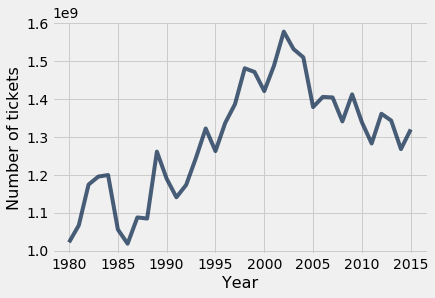

In [20]:
movies.plot('Year', 'Number of tickets')

## Rows ##

In [21]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [22]:
movies.where('#1 Movie', are.equal_to('Avatar'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [23]:
movies.where('#1 Movie', 'Avatar')

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [24]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"


In [25]:
movies.where('Number of Movies', are.below(450))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
1995,4.35,5493.5,411,Toy Story,"1,262,873,563.22"
1990,4.22,5021.8,410,Home Alone,"1,190,000,000.00"
1982,2.94,3453,428,E.T.,"1,174,489,795.92"
1981,2.78,2966,173,Raiders / Lost Ark,"1,066,906,474.82"
1980,2.69,2749,161,The Empire Strikes Back,"1,021,933,085.50"


In [26]:
movies.where('Year', are.above(2010))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"


In [27]:
movies.take(3)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"


In [28]:
movies.take(np.arange(4))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
